Dataset source Maven Analytics Data Playground

120 Years of Olympic History
Historical data on the modern Olympic Games, from Athens 1896 to Rio 2016. Each row corresponds to an individual athlete competing in an individual event, including the athlete's name, sex, age, height, weight, country, and medal, and the event's name, sport, games, year, and city.

Recommended Analysis
Analyze and visualize the % of athletes who were female over time.

Compare and contrast the summer and the winter games...

How many athletes compete?

How many countries compete?

How many events are there?

Analyze and visualize country-level trends...

Which countries send the most athletes to the olympics?

Do they also tend to win the most medals?

How have these trends changed over time?

Data Cleaning-Handling Missing Values,Removing Duplicates

In [289]:
import pandas as pd

In [290]:
df=pd.read_csv('athlete_events.csv')

In [291]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [292]:
df1=pd.read_csv('athlete_events_data_dictionary.csv')

data field for athlete dataset

In [293]:
df1.head(15)

,Field,Description
0,ID,Unique number for each athlete
1,Name,Athlete's name
2,Sex,Male (M) or Female (F)
3,Age,Integer
4,Height,In centimeters
5,Weight,In kilograms
6,Team,Team name
7,NOC,National Olympic Committee 3-letter code
8,Games,Year and season
9,Year,Integer


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [295]:
df.shape

(271116, 15)

In [296]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Handling missing values

In [297]:
df['Age'].fillna(df['Age'].median(),axis=0,inplace=True)
df['Height'].fillna(df['Height'].mean(),axis=0,inplace=True)
df['Weight'].fillna(df['Weight'].median(),axis=0,inplace=True)
df['Medal'].fillna('No Information',axis=0,inplace=True)

In [298]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Checking rest of the attribute values

In [299]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.502493,175.33897,70.539500,1978.378480
std,39022.286345,6.287361,9.27810,12.578184,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,24.000000,175.33897,70.000000,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


In [300]:
df.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,271116
unique,134732,2,1184,230,51,2,42,66,765,4
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,No Information
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,231333


In [301]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [302]:
df['Games'].unique()

array(['1992 Summer', '2012 Summer', '1920 Summer', '1900 Summer',
       '1988 Winter', '1992 Winter', '1994 Winter', '1932 Summer',
       '2002 Winter', '1952 Summer', '1980 Winter', '2000 Summer',
       '1996 Summer', '1912 Summer', '1924 Summer', '2014 Winter',
       '1948 Summer', '1998 Winter', '2006 Winter', '2008 Summer',
       '2016 Summer', '2004 Summer', '1960 Winter', '1964 Winter',
       '1984 Winter', '1984 Summer', '1968 Summer', '1972 Summer',
       '1988 Summer', '1936 Summer', '1952 Winter', '1956 Winter',
       '1956 Summer', '1960 Summer', '1928 Summer', '1976 Summer',
       '1980 Summer', '1964 Summer', '2010 Winter', '1968 Winter',
       '1906 Summer', '1972 Winter', '1976 Winter', '1924 Winter',
       '1904 Summer', '1928 Winter', '1908 Summer', '1948 Winter',
       '1932 Winter', '1936 Winter', '1896 Summer'], dtype=object)

In [303]:
df['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

In [304]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [305]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [306]:
df['Medal'].unique()

array(['No Information', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [307]:
pd.set_option('display.max_rows',1500)

In [308]:
df['Team'].value_counts()

United States                                      17847
France                                             11988
Great Britain                                      11404
Italy                                              10260
Germany                                             9326
Canada                                              9279
Japan                                               8289
Sweden                                              8052
Australia                                           7513
Hungary                                             6547
Poland                                              6143
Switzerland                                         5844
Netherlands                                         5718
Soviet Union                                        5535
Finland                                             5379
Spain                                               5224
China                                               4975
Russia                         

Looking for duplicates

In [309]:
df.duplicated().sum()

1385

In [310]:
df[df.duplicated()==True].sort_values(by='Name')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
202977,101940,A. Wynne Rogers,M,24.0,175.33897,70.0,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information
144168,72353,"Aase Lundsteen (-Madsen, -Hoffman-Madsen)",F,20.0,175.33897,70.0,Denmark,DEN,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,No Information
23552,12380,Acee Blue Eagle,M,24.0,175.33897,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information
23546,12380,Acee Blue Eagle,M,24.0,175.33897,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information
23561,12380,Acee Blue Eagle,M,24.0,175.33897,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information
23548,12380,Acee Blue Eagle,M,24.0,175.33897,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information
23549,12380,Acee Blue Eagle,M,24.0,175.33897,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information
23550,12380,Acee Blue Eagle,M,24.0,175.33897,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information
23551,12380,Acee Blue Eagle,M,24.0,175.33897,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information
23547,12380,Acee Blue Eagle,M,24.0,175.33897,70.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information


In [311]:
df[df['Name']=='A. Wynne Rogers']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
202976,101940,A. Wynne Rogers,M,24.0,175.33897,70.0,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information
202977,101940,A. Wynne Rogers,M,24.0,175.33897,70.0,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Information


removing duplicates

In [312]:
df.drop_duplicates(inplace=True)

In [313]:
df.duplicated().sum()

0

Recommended Analysis Analyze and visualize the % of athletes who were female over time.


In [314]:
df_female=df[df['Sex']=='F']

In [315]:
df_female=df_female.groupby('Year')['Sex'].count().reset_index(name='Female Count')

In [316]:
df_female.head()

,Year,Female Count
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [317]:
y=len(df['Sex'])
df_female['Female Pergentage']=df_female['Female Count'].apply(lambda x:(x/y)*100)

In [318]:
df_female

,Year,Female Count,Female Pergentage
0,1900,33,0.012234
1,1904,16,0.005932
2,1906,11,0.004078
3,1908,47,0.017425
4,1912,87,0.032254
5,1920,134,0.049679
6,1924,251,0.093056
7,1928,424,0.157194
8,1932,287,0.106402
9,1936,528,0.195751


Text(0.5, 1.0, 'Female Participation in Olympics over the years')

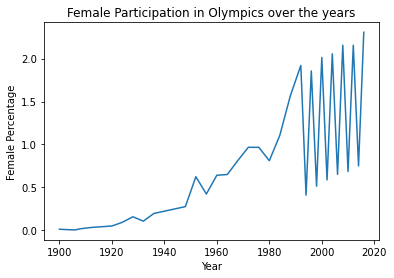

In [319]:
plt.plot(df_female['Year'],df_female['Female Pergentage'])
plt.xlabel('Year')
plt.ylabel('Female Percentage')
plt.title('Female Participation in Olympics over the years')


Text(0.5, 1.0, 'Female Participation in Olympics from 1981 to 2020')

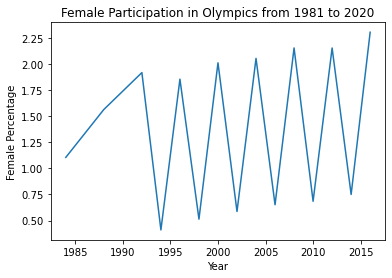

In [320]:
df_female_1980_to_2020=df_female[df_female['Year']>1980]
plt.plot(df_female_1980_to_2020['Year'],df_female_1980_to_2020['Female Pergentage'])
plt.xlabel('Year')
plt.ylabel('Female Percentage')
plt.title('Female Participation in Olympics from 1981 to 2020')


Compare and contrast the summer and the winter games...


How many athletes compete?

Text(0, 0.5, 'Number of Athletes')

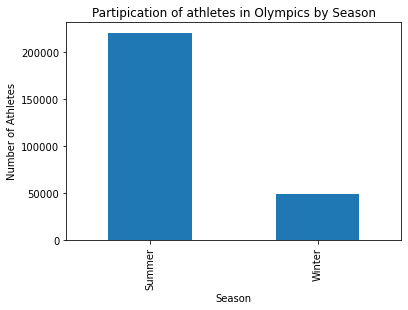

In [321]:
df.groupby('Season')['ID'].count().plot(kind='bar')
plt.title('Partipication of athletes in Olympics by Season')
plt.ylabel('Number of Athletes')

How many countries compete?

Text(0, 0.5, 'Number of Countries')

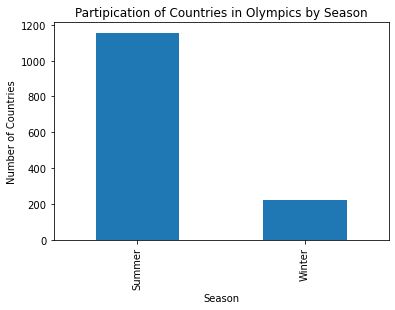

In [322]:
df.groupby('Season')['Team'].nunique().plot(kind='bar')
plt.title('Partipication of Countries in Olympics by Season')
plt.ylabel('Number of Countries')

How many events are there?

Text(0, 0.5, 'Number of Events')

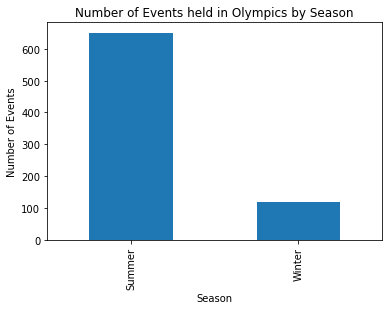

In [323]:
df.groupby('Season')['Event'].nunique().plot(kind='bar')
plt.title('Number of Events held in Olympics by Season')
plt.ylabel('Number of Events')

Analyze and visualize country-level trends...

Which countries send the most athletes to the olympics?

In [324]:
top_countries_sending_athletes=df.groupby('Team')['ID'].nunique().reset_index(name='Number of athletes')

In [325]:
top_countries_sending_athletes=top_countries_sending_athletes.sort_values(by='Number of athletes',ascending=False)

In [326]:
top_10_countries_sending_athletes=top_countries_sending_athletes.iloc[0:10,:]

Text(0.5, 0, 'Number of Athletes')

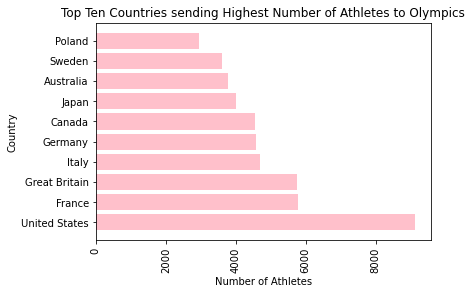

In [327]:
plt.barh(top_10_countries_sending_athletes['Team'],top_10_countries_sending_athletes['Number of athletes'],color='pink')
plt.xticks(rotation=90)
plt.title('Top Ten Countries sending Highest Number of Athletes to Olympics')
plt.ylabel('Country')
plt.xlabel('Number of Athletes')

Do they also tend to win the most medals?(Countries sending most athletes)

In [328]:
country_most_medals=df[~(df['Medal']=='No Information')]

In [329]:
country_most_medals=country_most_medals.groupby('Team')['Medal'].count().reset_index(name='Number of Medals')

In [330]:
country_most_medals=country_most_medals.sort_values(by='Number of Medals',ascending=False)

In [331]:
top_10_country_most_medals=country_most_medals.iloc[0:10,:]

Text(0.5, 0, 'Number of Medals')

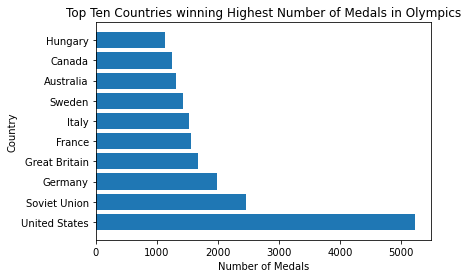

In [332]:
plt.barh(top_10_country_most_medals['Team'],top_10_country_most_medals['Number of Medals'])
plt.title('Top Ten Countries winning Highest Number of Medals in Olympics')
plt.ylabel('Country')
plt.xlabel('Number of Medals')

In [333]:
countries_with_most_medals_athletes=top_10_countries_sending_athletes[top_10_countries_sending_athletes['Team'].isin(top_10_countries_sending_athletes['Team'])].reset_index()

Countries with most number of athletes and medals

In [334]:
countries_with_most_medals_athletes['Team']

0    United States
1           France
2    Great Britain
3            Italy
4          Germany
5           Canada
6            Japan
7        Australia
8           Sweden
9           Poland
Name: Team, dtype: object

How have these trends changed over time?

In [335]:
year_athlete_trends=df.groupby(['Year','Team'])['ID'].nunique().reset_index(name='Number of Athletes')

In [336]:
year_athlete_trends=year_athlete_trends.sort_values(by=['Year','Number of Athletes'],ascending=[True,False])

In [337]:
year_athlete_trends=year_athlete_trends[year_athlete_trends.Team.isin(top_10_countries_sending_athletes['Team'])]
#Top ten counties with most athletes in Olympics over years

In [338]:
year_athlete_trends

,Year,Team,Number of Athletes
6,1896,Germany,19
17,1896,United States,14
5,1896,France,12
7,1896,Great Britain,10
0,1896,Australia,1
14,1896,Italy,1
15,1896,Sweden,1
87,1900,France,540
200,1900,United States,59
106,1900,Great Britain,39


Text(0, 0.5, 'Number of Athletes')

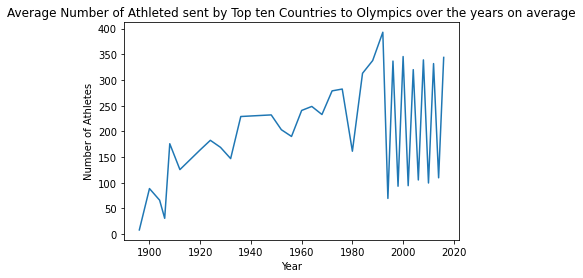

In [339]:
year_athlete_trends.groupby('Year')['Number of Athletes'].mean().plot()
plt.title('Average Number of Athleted sent by Top ten Countries to Olympics over the years on average')
plt.ylabel('Number of Athletes')

In [340]:
year_country_medal_trends=df[~(df['Medal']=='No Information')]

In [341]:
year_country_medal_trends=year_country_medal_trends.groupby(['Year','Team'])['ID'].nunique().reset_index(name='Number of Medals')

In [342]:
year_country_medal_trends=year_country_medal_trends.sort_values(by=['Year','Number of Medals'],ascending=[True,False])

In [343]:
year_country_medal_trends=year_country_medal_trends[year_country_medal_trends.Team.isin(top_10_country_most_medals['Team'])]

In [344]:
year_country_medal_trends

,Year,Team,Number of Medals
6,1896,Germany,12
13,1896,United States,12
5,1896,France,7
7,1896,Great Britain,6
11,1896,Hungary,5
0,1896,Australia,1
48,1900,France,61
96,1900,United States,27
56,1900,Great Britain,16
62,1900,Italy,4


In [345]:
#Top ten counties with most medals in Olympics over years

Text(0, 0.5, 'Number of Medals')

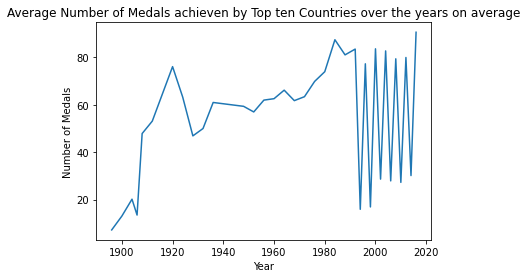

In [346]:
year_country_medal_trends.groupby('Year')['Number of Medals'].mean().plot()
plt.title('Average Number of Medals achieven by Top ten Countries over the years on average')
plt.ylabel('Number of Medals')